## Data Analysis do Airbnb

### Carregando as bioblotecas

In [2]:
import pandas as pd
import datetime
import glob
from minio import Minio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Baixando o Dataset do Data Lake.

In [75]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

In [5]:
client.fget_object("processing",
                   "airbnb_dataset.parquet",
                   "temp_.parquet",
                   )



In [3]:
df = pd.read_parquet("temp_.parquet")

In [4]:
df.head()

,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,index.1,id.1,log_price,property_type,...,host_identity_verified,id,host_response_rate,host_since,last_review,neighbourhood,review_scores_rating,zipcode,bedrooms,beds
0,strict,1,NYC,f,40.696524,-73.991617,0,6901257,5.010635,Apartment,...,t,6901257,100%,2012-03-26,2016-07-18,Brooklyn Heights,100,11201,1,1
1,strict,1,NYC,t,40.766115,-73.989040,1,6304928,5.129899,Apartment,...,f,6304928,100%,2017-06-19,2017-09-23,Hell's Kitchen,93,10019,3,3
2,moderate,1,NYC,t,40.808110,-73.943756,2,7919400,4.976734,Apartment,...,t,7919400,100%,2016-10-25,2017-09-14,Harlem,92,10027,1,3
3,flexible,1,SF,f,37.772004,-122.431619,3,13418779,6.620073,House,...,t,13418779,100%,2015-04-19,2017-04-30,Lower Haight,100,94117.0,2,2
4,moderate,1,DC,t,38.925627,-77.034596,4,3808709,4.744932,Apartment,...,t,3808709,100%,2015-03-01,2017-01-22,Columbia Heights,40,20009,0,1


In [5]:
df = df.drop(['index.1', 'id.1', 'id'], axis = 1)

#### Verificando os registros missing.

In [6]:
df.isnull().sum()

cancellation_policy       0
cleaning_fee              0
city                      0
instant_bookable          0
latitude                  0
longitude                 0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bed_type                  0
number_of_reviews         0
bathrooms                 0
host_has_profile_pic      0
first_review              0
host_identity_verified    0
host_response_rate        0
host_since                0
last_review               0
neighbourhood             0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

#### Sem valores ausentes.

In [7]:
# Convertendo os valores dos preços e renomenado 'log_price' para 'price'
df['price'] = np.e**df['log_price']
df = df.drop('log_price', axis=1)

###  Análise Estatística

In [8]:
# Estatística básica das features númericas
df.describe()

,cleaning_fee,latitude,longitude,accommodates,number_of_reviews,bathrooms,review_scores_rating,bedrooms,beds,price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,0.734075,38.445958,-92.397525,3.155146,20.900568,1.234628,95.405972,1.265467,1.709611,160.370849
std,0.441828,3.080167,21.705322,2.153589,37.828641,0.581386,7.328337,0.851671,1.253389,168.580415
min,0.000000,33.338905,-122.511500,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000
25%,0.000000,34.127908,-118.342374,2.000000,1.000000,1.000000,93.000000,1.000000,1.000000,75.000000
50%,1.000000,40.662138,-76.996965,2.000000,6.000000,1.000000,98.000000,1.000000,1.000000,111.000000
75%,1.000000,40.746096,-73.954660,4.000000,23.000000,1.000000,100.000000,1.000000,2.000000,185.000000
max,1.000000,42.390437,-70.985047,16.000000,605.000000,8.000000,100.000000,10.000000,18.000000,1999.000000


#### Vamos explorar as correlações entre as variáveis númericas. Queremos distacar as variáveis com as maiores correlações, principalmente encontrar as maoiores correlações das features com o preço. É rasoalvel formularmos a hipótese de que a maioria das variáveis númericas tem correlação com preço maior que 0.5.

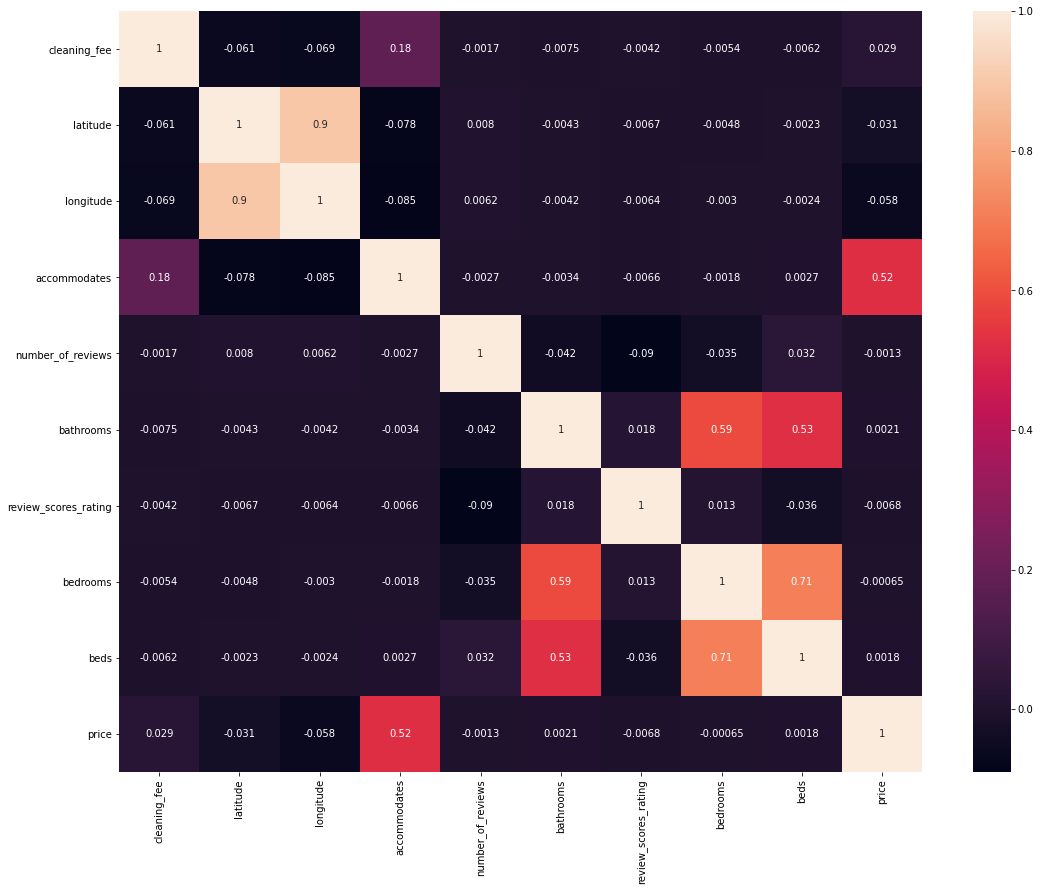

In [9]:
# Correlação entre as variáveis númericas
f, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(df.corr(), annot = True);

#### Surpreendentimente somente a feature 'accommodates' tem correlação maior do que 0.5 com o preço. As demais features númericas tem baixa correlação com o preço. Para descobrirmos porque esse dataset possuie features, que a pricípio deveriam impactar diretamente com o preço de locação, mas possuem baixa correlação devemos comparar com outras databases do airbnb.

#### Vamos listar as principais features. Principais features com correlação positiva:
 - **'cleaning fee': 0.029**
 - **'bathrooms': 0.0021**
#### Principais features com correlação negativa:
 - **'longitude": -0.058**
 - **'latitude': -0.031**

### Plotando as princípais features númericas

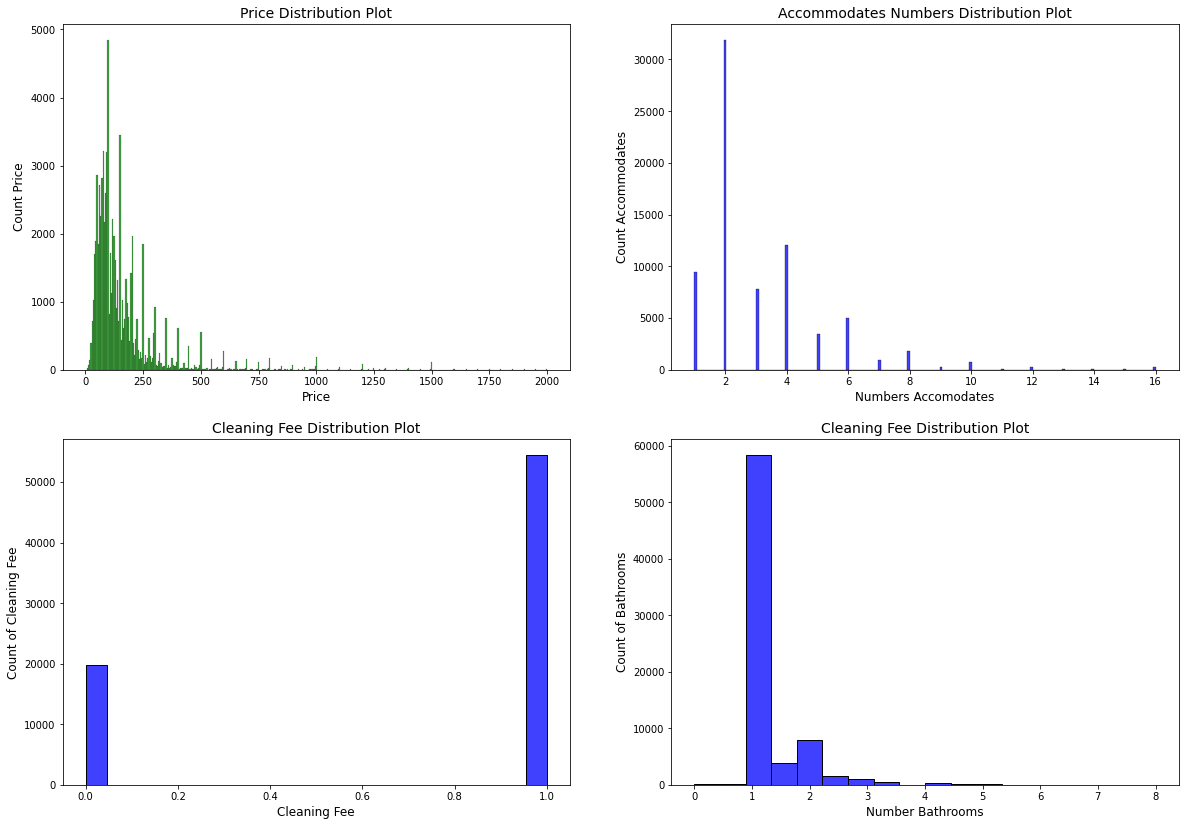

In [35]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
plt.title('Price Distribution Plot', size = 14, color ='black')
sns.histplot(df.price, color="g")
plt.ylabel('Count Price', size=12)
plt.xlabel('Price', size =12)

plt.subplot(2,2,2)
plt.title('Accommodates Numbers Distribution Plot', size = 14, color ='black')
sns.histplot(df.accommodates,color="b" )
plt.ylabel('Count Accommodates', size=12)
plt.xlabel('Numbers Accomodates', size =12)

plt.subplot(2,2,3)
plt.title('Cleaning Fee Distribution Plot', size = 14, color ='black')
sns.histplot(df.cleaning_fee, color="b" )
plt.ylabel('Count of Cleaning Fee', size=12)
plt.xlabel('Cleaning Fee', size =12)

plt.subplot(2,2,4)
plt.title('Cleaning Fee Distribution Plot', size = 14, color ='black')
sns.histplot(df.bathrooms, color="b" )
plt.ylabel('Count of Bathrooms', size=12)
plt.xlabel('Number Bathrooms', size =12)

plt.show()

#### Vemos que 'cleaning fee' apresenta um distriuição em dois valores distintos 0 ou 1. Isso sugere que ao invés de termos uma feature númerica devemos converter para uma feature categórica.

In [10]:
# Convertando a feature  númerica'cleaning fee' em uma feature categórica.
df['cleaning_fee'] = df['cleaning_fee'].astype('object')

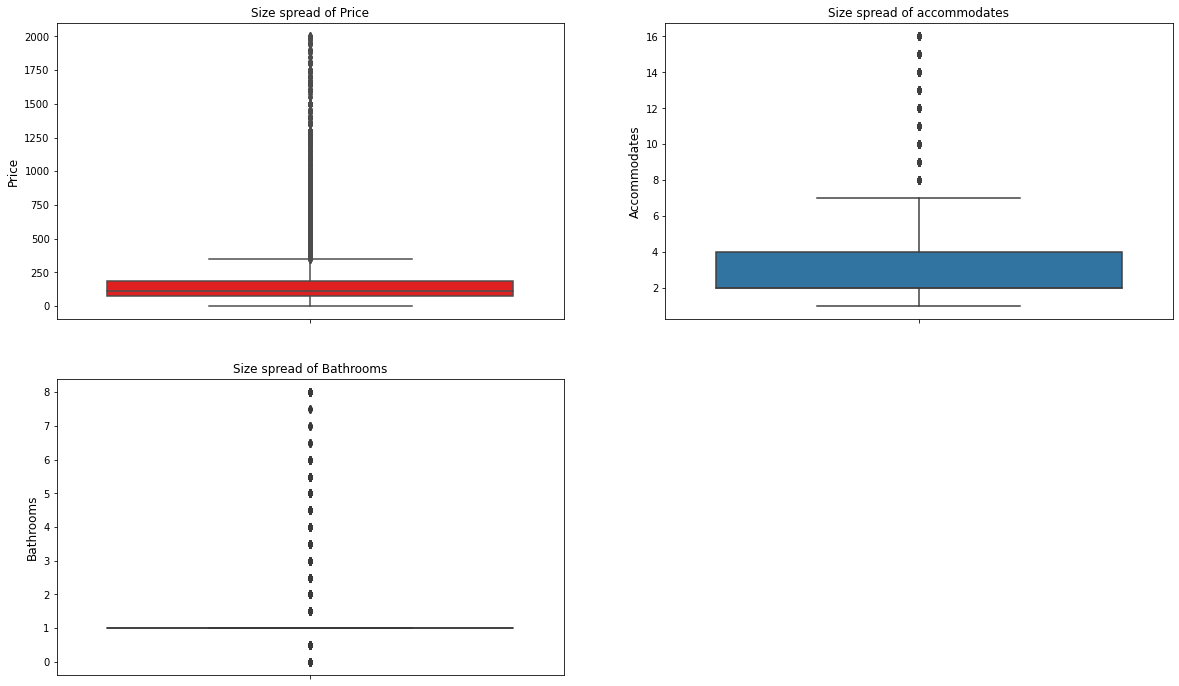

In [11]:
# Plotando a dispersão das príncipais features com o boxplot
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
plt.title('Size spread of Price')
sns.boxplot(y=df.price, color = "r")
plt.ylabel('Price', size=12)

plt.subplot(2,2,2)
plt.title('Size spread of accommodates')
sns.boxplot(y=df.accommodates)
plt.ylabel('Accommodates', size=12)



plt.subplot(2,2,3)
plt.title('Size spread of Bathrooms')
sns.boxplot(y=df.bathrooms, color = "y")
plt.ylabel('Bathrooms', size=12)


plt.show()

#### O preço apresenta outliars valores bem acima da mediana. Esses valore elavados de alguns preços podem representar
#### imóveis localizados em áreas nobres das cidades. Para exploarar essa hipótese podemos plotar a localização dos imóveis 
#### de alto preço em um mapa.

## Plotando os principais agrupamentos do preço com as features categóricas

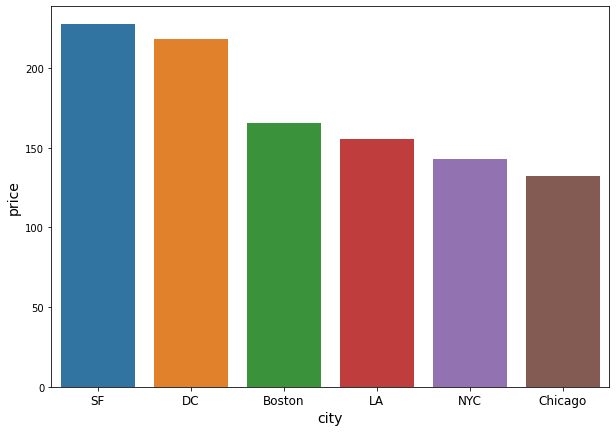

In [36]:
# Plotando  o agrupamento do preço médio em termos das cidades.
data = df[['city', 'price']].groupby(['city'], as_index=False).mean().sort_values(by='price',ascending=False).head(n=6)

plt.figure(figsize = (10, 7))
plt.xlabel('city', size = 14)
plt.ylabel('city', size = 14)
plt.xticks(size=12)
sns.barplot(x='city', y= 'price', data=data);

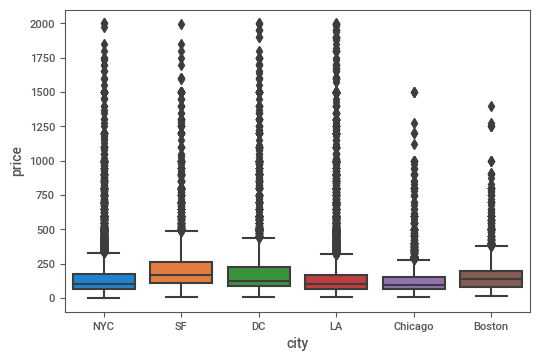

In [104]:
# Mostrando a dispersão dos preços dos imóveis em relação as cidades. Ambos os resultados apresentam bastantes outliers.
sns.boxplot(x='city', y='price', data=df)
plt.show;

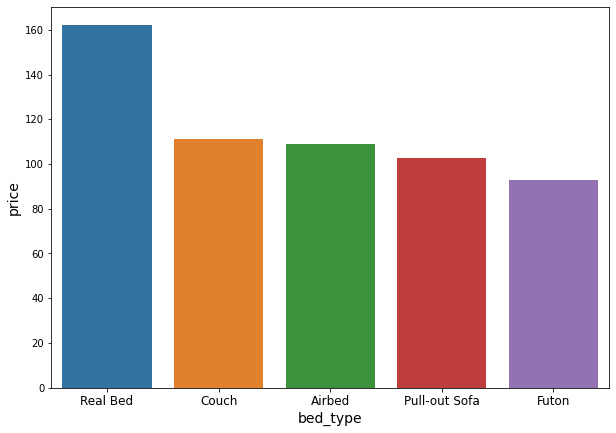

In [37]:
# Agrupando o preço médio de locação por tipo de cama
data2 = df[['bed_type', 'price']].groupby(['bed_type'], as_index= False).mean().sort_values(by='price',ascending=False).head(n=5)

plt.figure(figsize = (10, 7))
plt.xlabel('bed_type', size = 14)
plt.ylabel('log_price', size = 14)
plt.xticks(size=12)
sns.barplot(x='bed_type', y='price', data=data2);

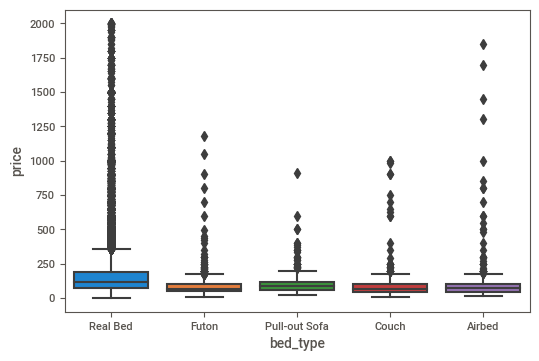

In [105]:
# Mostrando a dispersão dos preços dos imóveis em relação aos tipos de cama 'bed_type'. 'Real Bed' 
# apresentam as maiores variações nos preços.
ns.boxplot(x='bed_type', y='price', data=df)
plt.show;

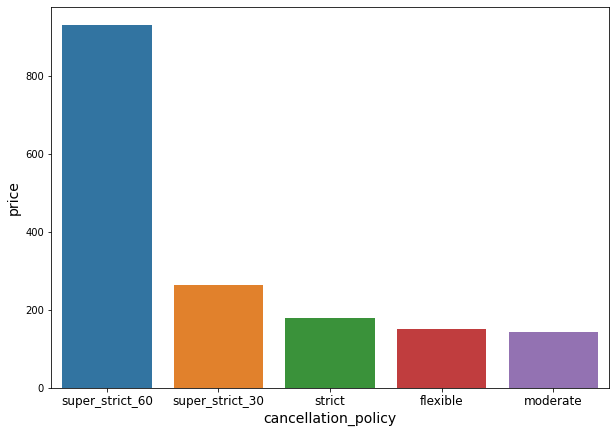

In [38]:
# Agrupando o preço médio de locação pelo tipo de política de cancelamento
data3= df[['cancellation_policy', 'price']].groupby(['cancellation_policy'], as_index= False).mean().sort_values(by='price',ascending=False).head(n=5)

plt.figure(figsize = (10, 7))
plt.xlabel('cancellation_policy', size = 14)
plt.ylabel('price', size = 14)
plt.xticks(size=12)
sns.barplot(x='cancellation_policy', y='price', data=data3);

#### Os imóveis que possuem uma política super restrita do tipo 'super_strict_60' apresentam os maiores valores de preço. 

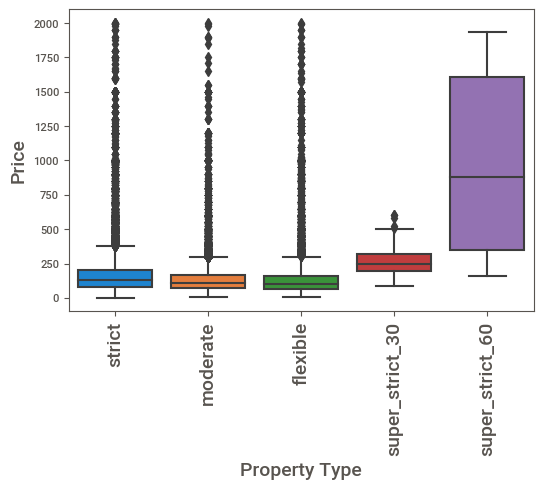

In [121]:
# Mostrando a dispersão dos preços dos imóveis em relação aos tipos de políticas de cancelamento. A politica de 
# cancelamento mais rígida trm uma dispersão mais homogênea nos preços.
sns.boxplot(x='cancellation_policy', y='price', data=df)
plt.ylabel('Price', size = 14)
plt.xlabel('Property Type', size = 14)
plt.xticks(size = 14, rotation = 90)
plt.show;

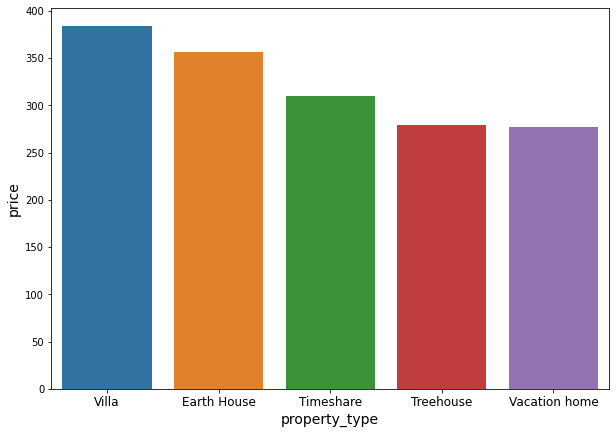

In [39]:
# Agrupando o preço médio de locação pelo tipo de propriedade que os imóveis estão localizados.
data4 = df[['property_type', 'price']].groupby(['property_type'], as_index= False).mean().sort_values(by='price',ascending=False).head(n=5)

plt.figure(figsize = (10, 7))
plt.xlabel('property_type', size = 14)
plt.ylabel('price', size = 14)
plt.xticks(size=12)
sns.barplot(x='property_type', y='price', data=data4);

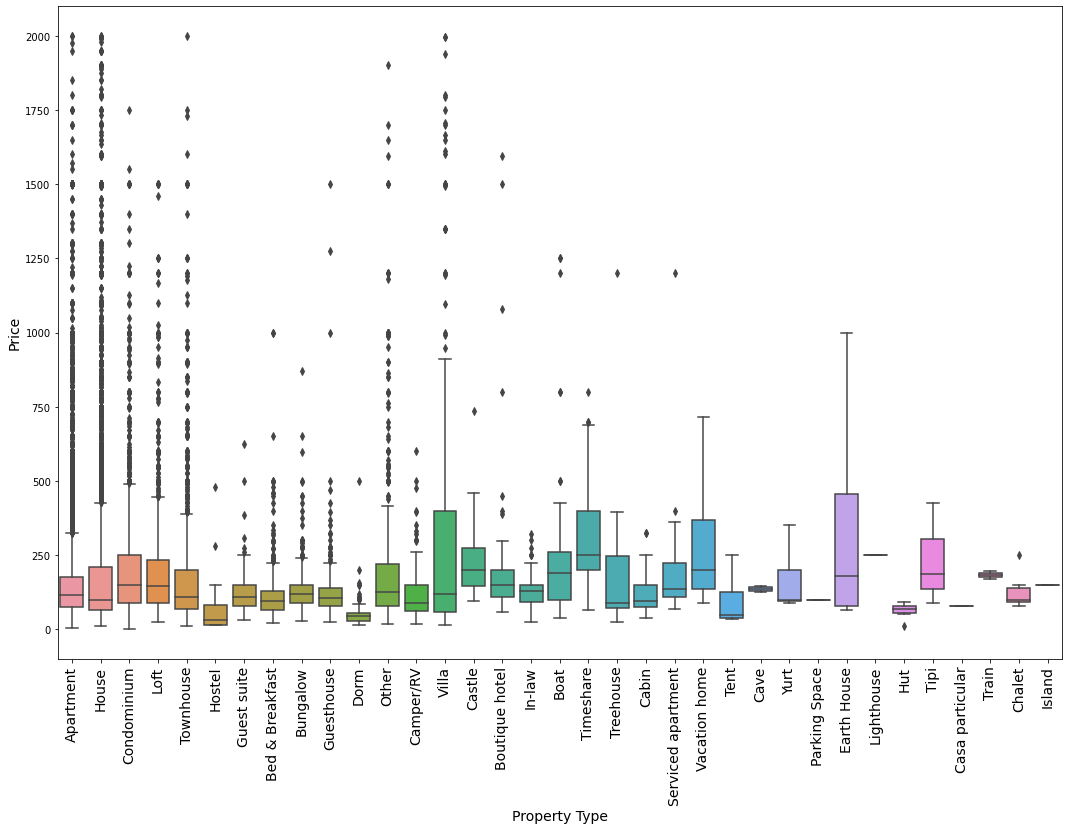

In [12]:
# Dispersão dos preços dos imóveis em termos do tipo de propriedade em que estão localizadas.
plt.figure(figsize = (18, 12))
sns.boxplot(x='property_type', y='price', data=df)
plt.ylabel('Price', size = 14)
plt.xlabel('Property Type', size = 14)
plt.xticks(size = 14, rotation = 90)
plt.show;

#### 'Apartmente', 'House', 'Townhouse' e 'vila' são os tipos de propriedades que apresentam as maiores variações nos preços.

## Clusterizando as maiores correlações entre as features.

#### Usaremos o método de classificação de cluster para avaliar as features com as maiores correlações que indentificamos.

In [13]:
# As features 'bedrooms' e 'beds' possuem em torno de 0.72 de correlação.
from sklearn.cluster import KMeans

# Definindo o número de clusters
kmeans = KMeans(n_clusters=3,random_state=2)

df_cluster = df[['bedrooms', 'beds']]

kmeans.fit(df_cluster)


KMeans(n_clusters=3, random_state=2)

In [14]:
kmeans_colors = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans.labels_]

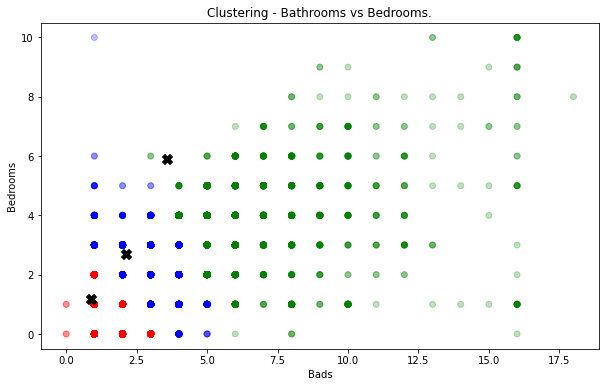

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.scatter( x="beds"
            ,y="bedrooms"
            ,data=df_cluster,
            alpha=0.25,color = kmeans_colors)

plt.xlabel("Bads")
plt.ylabel("Bedrooms")

plt.scatter( x=kmeans.cluster_centers_[:,0]
            ,y=kmeans.cluster_centers_[:,1]
            ,color="black"
            ,marker="X",s=100)

plt.title("Clustering - Bedrooms vs Beds.")
plt.show()

#### Dos 3 grupos classificados, a grande maioria dos dados representa uma quantidade de quartos que se econtra numa faixa entre 1 e 7 contendo entre 3 a 12 camas.

In [23]:
# As features 'bathrooms' e 'beds' possuem em torno de 0.72 de correlação.
kmeans1 = KMeans(n_clusters=3,random_state=2)

df_cluster1 = df[['bedrooms', 'bathrooms']]

kmeans1.fit(df_cluster)

KMeans(n_clusters=3, random_state=2)

In [24]:
kmeans_colors1 = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans1.labels_]

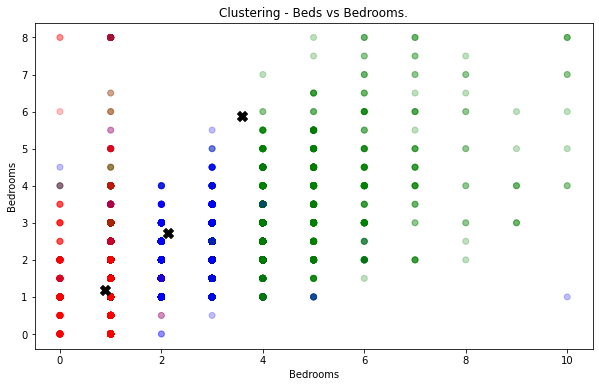

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.scatter( x="bedrooms"
            ,y="bathrooms"
            ,data=df_cluster1,
            alpha=0.25,color = kmeans_colors1)

plt.xlabel("Bedrooms")
plt.ylabel("Bedrooms")

plt.scatter( x=kmeans.cluster_centers_[:,0]
            ,y=kmeans.cluster_centers_[:,1]
            ,color="black"
            ,marker="X",s=100)

plt.title("Clustering - Beds vs Bedrooms.")
plt.show()

#### Dos 3 grupos classificados, a grande maioria dos dados representa uma quantidade de quartos que se econtra numa faixa entre 1 e 7 contendo entre 4 a 8 banheiros.

### Carrega os artefatos para o Data Lake.

#### Por fim vamos carregar os dados que obtivemos em nossa análise de dados preliminar no data lake do minio, na zona de cureted. Salvaremos os dois clusters obtidos acimas, além de salvarmos o dataset do airbnb em arquivo csv. 

#### Usaremos também a biblioteca sweetviz que permite obtermos várias gráficos de nossa base de dados automáticamente.

In [72]:
import joblib

joblib.dump(kmeans, "cluster_bedrooms_bathrooms.joblib")

joblib.dump(kmeans1, "cluster_beds_bedrooms.joblib")

['cluster_beds_bedrooms.joblib']

In [76]:
client.fput_object(
    "curated",
    "cluster_bedrooms_bathrooms.joblib",
    "cluster_bedrooms_bathrooms.joblib"
)

In [77]:
client.fput_object(
    "curated",
    "cluster_beds_bedrooms.joblib",
    "cluster_beds_bedrooms.joblib"
)

In [78]:

import sweetviz as sv

my_report = sv.analyze(df,"price")
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:06 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [89]:
df.to_csv('airbnb_dataset.csv',index = False)

In [90]:
client.fput_object(
    "curated",
    "airbnb_dataset.csv",
    "airbnb_dataset.csv"
)